# Think Bayes

This notebook presents example code and exercise solutions for Think Bayes.

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import classes from thinkbayes2
from thinkbayes2 import Pmf, Suite

import thinkplot

In [2]:
class Urns(Suite):
    
    def Likelihood(self, data, hypo):
        nblue = hypo
        ngreen = 3-hypo
        if(data == 'B'):
            return nblue/3
        else:
            return ngreen/3

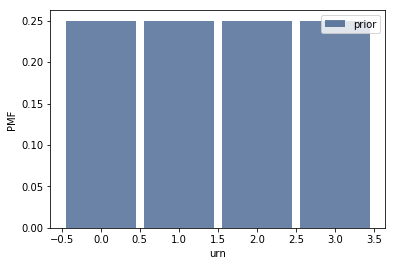

In [3]:
prior = Urns([0,1,2,3],label='prior')
thinkplot.Hist(prior)
thinkplot.Config(xlabel='urn', ylabel='PMF')

0 0.0
1 0.0036231884057971
2 0.1159420289855072
3 0.8804347826086956
P(next marble is blue) = 0.9589371980676328


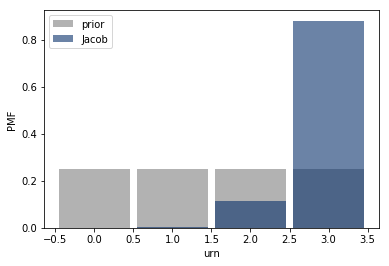

In [4]:
J = prior.Copy()
J.label = 'Jacob'
for outcome in 'BBBBB':
    J.Update(outcome)
J.Print()
thinkplot.Hist(prior, color='gray')
thinkplot.Hist(J)
thinkplot.Config(xlabel='urn', ylabel='PMF')

pblue = 0
for urn in range(4):
    pblue += J[urn]*(urn/3)
print('P(next marble is blue) =',pblue)

0 0.0
1 1.9073449948406316e-06
2 0.999998092655005
3 0.0
P(next marble is blue) = 0.6666660308850016


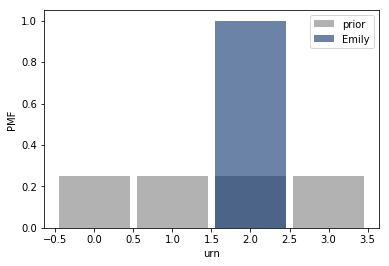

In [5]:
E = J.Copy();
E.label = 'Emily'
for outcome in 'B'*17+'G'*3:
    E.Update(outcome)
E.Print()
thinkplot.Hist(prior, color='gray')
thinkplot.Hist(E)
thinkplot.Config(xlabel='urn', ylabel='PMF')

pblue = 0
for urn in range(4):
    pblue += E[urn]*(urn/3)
print('P(next marble is blue) =',pblue)

Sets options for the current figure.
Give Emily a blue ball
0 0.0
1 9.536734069124156e-07
2 0.9999990463265931
3 0.0
Give Jacob a blue ball
0 0.0
1 0.001259445843828715
2 0.08060453400503775
3 0.9181360201511334


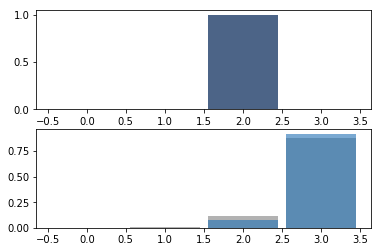

In [6]:
E2 = E.Copy()
J2 = J.Copy()
E2.Update('B')
J2.Update('B')
thinkplot.SubPlot(1,2,1)
thinkplot.Hist(E, color='gray')
thinkplot.Hist(E2)
thinkplot.SubPlot(2,2,1)
print(thinkplot.Figure.__doc__)
thinkplot.Hist(J, color='gray')
thinkplot.Hist(J2)
print('Give Emily a blue ball')
E2.Print()
print('Give Jacob a blue ball')
J2.Print()

Give Emily a green ball
0 0.0
1 3.8146827137652828e-06
2 0.9999961853172863
3 0.0
Give Jacob a green ball
0 0.0
1 0.05882352941176471
2 0.9411764705882354
3 0.0


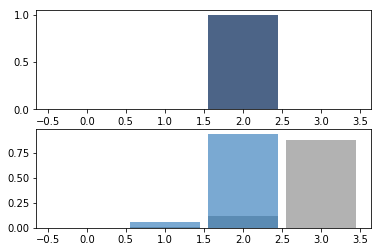

In [7]:
E3 = E.Copy()
J3 = J.Copy()
E3.Update('G')
J3.Update('G')
thinkplot.SubPlot(1,2,1)
thinkplot.Hist(E, color='gray')
thinkplot.Hist(E3)
thinkplot.SubPlot(2,2,1)
thinkplot.Hist(J, color='gray')
thinkplot.Hist(J3)
print('Give Emily a green ball')
E3.Print()
print('Give Jacob a green ball')
J3.Print()

Who has stronger evidence? I'm inclined to say Emily does, since her beliefs cannot change wildly on a single outcome. However, I only believe this because I've seen that green balls are possible. If they had both never seen a green marble, then they would both have evidence that is 'week' to green marbles, but they might be impossible.